![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

## **Preprocesamiento de datos**

El preprocesamiento es uno de los estadios más importantes en el flujo de trabajo de un data scientist. Suele demandar, en promedio, entre el 60% y 70% de nuestro tiempo. La distinción entre un buen y un mal modelo de Machine Learning, antes que por la elección de un algoritmo específico, estará dada por un correcto preprocesamiento de datos.

> ### *"Garbage in, garbage out"*

Si queremos un modelo predictivo de calidad, debemos darle datos de calidad. Podemos elegir el algoritmo más sofisticado y complejo, optimizar los hiperparámetros tratando de encontrar las mejores combinaciones posibles, pero si al modelo lo alimentamos con datos que carecen de sentido, no podemos esperar que sus predicciones sí lo tengan.

### `Etapas`:

1. Valores faltantes

1. Valores atípicos

3. Escalado/normalización

4. Codificación de variables categóricas

5. Selección de atributos relevantes

6. Ingeniería de features

- - -

### **1. Valores faltantes**

Generalmente, y de manera errónea, lo primero que buscamos responder en esta estapa es ¿qué técnica utilizo para imputar los valores faltantes del dataset? o ¿qué porcentaje de valores faltantes es suficiente para dropear esas filas?

El proceso que debemos seguir arranca con una pregunta inicial bastante diferente y trascendental en todo lo que devenga.

**`¿Por qué hay valores faltantes?`**

Para responder esta pregunta, tenemos tres grandes paradigmas bien diferenciados que nos darán una noción del escenario en que estamos situados.

+ MCAR

+ MAR

+ MNAR

#### **`MCAR`**

*Missing Completely At Random*.

La probabilidad de tener un dato faltante es la misma para todas las instancias. La causa de los datos que faltan no está relacionada directamente con los datos.

Ejemplo: fallas en el instrumento de medición o errores en la carga de los datos. Supongamos el caso de un encuestador que visita hogares para completar un cuestionario con preguntas cerradas. Recibe las respuestas, por parte del encuestado, de cada pregunta que va realizando, pero se olvida de marcar el casillero correspondiente en alguna pregunta. Cuando esos datos sean cargados en el sistema, tendremos valores faltantes en esos campos donde el encuestador cometió el error de no indicar la respuesta del encuestado. En efecto, la falta de valores en algunos campos no responde a ninguna razón que se desprenda de los datos o las preguntas realizadas -podría pasar que algunas preguntas sean evitadas adrede por los encuestados por connotaciones sociales, políticas, etc.- sino por cuestiones completamente azarosas.

#### **`MAR`**

*Missing At Random*. En este caso, la ausencia de valores sigue un patrón. Si la probabilidad de que falten datos es la misma solo dentro de los grupos definidos por los datos observados, entonces los datos faltan al azar. La causa de los datos que faltan está relacionada con otras variables.

Ejemplo: un encuestador realiza una EPH (Encuesta Permanente de Hogares). Se observa que varios encuestados no responden ante la pregunta de cuánto es su salario o remuneración laboral percibida. Al observar la totalidad de los datos finales de nuestro dataset, notamos que la mayoría de los valores faltantes en este campo -**salario**- están directamente relacionados con el barrio al que pertenece el encuestado. Entonces, podemos determinar que, si la encuesta se realiza en CABA, los ciudadanos de los barrios más pudientes (Recoleta, Palermo, Belgrano o Puerto Madero) indican cuánto es su salario -casi en todos los casos superior a la media de CABA- en una EPH. Por el contrario, los encuestados ubicados en barrios marginales no responden esa pregunta de la encuesta. O bien podría darse la situación inversa a la planteada.

Para pensar, una técnica que consista en imputar los valores faltantes del campo **salario** con alguna medida de tendencia central, como la media, ¿distorsionaría nuestros datos? ¿afectaría la representatividad?

Este tipo de faltantes se presenta con más frecuencia que el caso visto anteriormente.

#### **`MNAR`**

*Missing Not At Random*. Se llega a este caso por descarte, cuando la presencia de valores faltantes en nuestro dataset no responde a ninguno de los dos paradigmas enunciados supra. Es el caso más complejo de identificar. A grandes rasgos, este tipo de valores nulos puede responder a dos razones:

1. El motivo de esta ausencia de valores se relaciona con datos no observados -es común que, en ensayos clínicos, si un tratamiento particular causa molestias, los pacientes sean más propensos a abandonar el estudio y, dado que se busca medir la eficacia de cada tratamiento, tengamos faltantes no aleatorios-.

2. La ausencia de valores responde directamente a la variable que queremos medir -cuando indicábamos que un encuestado evita responder una pregunta por la incomodidad que ella pueda generarle-. 

*Resumen de los tres mecanismos generadores de valores faltantes:*

<img src = "https://cjasn.asnjournals.org/content/clinjasn/early/2014/02/06/CJN.10141013/F2.large.jpg?width=800&height=600&carousel=1" height = 200>

Ahora sí, pasemos a las técnicas que existen para lidiar con los valores faltantes. De lo visto recientemente, se desprende que la estrategia utilizada para tratar los valores nulos estará, en gran medida, condicionada por la razón de que esos valores sean, precisamente, nulos. Es decir, el mecanismo que los está generando.

### **¿Qué hacemos con los valores faltantes?**

+ ***Eliminar los datos con problemas***: por fila -puede sesgar el resultado-. Por columna -podemos perder información relevante-.

+ ***Imputación***: rellenamos con estadísticos obtenidos de los datos que sí tenemos. También se puede imputar teniendo en cuenta los valores de otros atributos -por ejemplo, en vez de imputar los faltantes del campo salario con la media total, lo hacemos con la media de cada barrio-. Otra posibilidad, para realizar la imputación, es elaborar un modelo de Machine Learning que prediga el valor de ese dato faltante.

+ ***Agregar una variable dummy***: por atributo, para indicar si hay un valor faltante. Esa variable nos indica si ese dato es imputado.


- - -


### **2. Valores atípicos**

También denominados outliers o valores extremos. Son aquellos datos que difieren significativamente del resto de las observaciones. 

**`¿Por qué existen?`**

+ Error del instrumento de medición

+ Mezcla de distribuciones

Un ejemplo del primer caso podría darse cuando se ingresa incorrectamente un valor a la hora de ser cargado. Mientras que el segundo caso se presenta cuando se trabaja con muestras o subpoblaciones que no son tan homogéneas como se creía a priori.

Existe la posibilidad de que nos topemos con valores atípicos que no se inserten dentro de los dos casos enunciados. Allí, considerarlo o no como extremos, dependerá del problema con el que estemos tratando.

En algunas oportunidades, detectar valores outliers será precisamente nuestro objetivo. Un ejemplo de ello puede ser la detección de una transacción fraudulenta con tarjeta de crédito o la identificación de una persona enferma dentro de un conjunto de personas sanas.

Tenemos dos tipos de outliers: `univariado` y `multivariado`. El primer tipo se da cuando el outlier se desvía de los valores típicos de un feature. El segundo, cuando el outlier se desvía de los valores típicos que hay en la relación entre dos o más features.

**`¿Cómo detectarlos?`**

+ Visualización

+ IQR

+ 3σ 

Para detectar estos valores atípicos, podemos recurrir a las visualizaciones -a través de boxplots-, al rango intercuartílico o a la regla de las tres sigmas.

- - -

### **3. Escalado/normalización**

Es probable que, en nuestro dataset, contemos con distintas variables, medidas en diferentes unidades y con distintas escalas. Esto puede confundir a los modelos de ML, ya que no entienden de unidades. En especial, a los modelos que trabajan con distancias -como KNN-. Para evitar esto, recurrimos al escalado de datos.

Disponemos de tres formas para realizar el escalado:

+ `Escalado mínimo-máximo`: se emplea cuando nuestra variable puede tomar valores entre un mínimo y un máximo bien delimitados.

+ `Z-score`: también conocido como estandarización o normalización. Es la técnica más empleada. Es una medida de cuán lejos está un dato del promedio, medido en desviación estándar. También sirve para aplicar la regla de las 3 sigmas para detectar outliers, aplicando la máscara $|Z| > 3$.

+ `Escalados no lineales`: se usa cuando el atributo no sigue una distribución lineal. En el caso de una distribución que siga una *ley de potencias*, se toma el logaritmo de los valores. Otro método es tomar la raíz cuadrada.

<img src = "https://i.postimg.cc/nzFpZyfM/escalado.jpg" height = 300>

- - -

### **4. Codificación de variables categóricas**

Como sabemos, los modelos de Machine Learning solo entienden de números. Para ello, debemos transformar nuestros atributos del dataset que contengan datos cualitativos en cuantitativos.

Ahora bien, supongamos que en un dataset tenemos una columna categórica que brinda información sobre la ciudad en la que vive una persona. Al hacer la conversión de la variable ***ciudad*** en numérica, nos quedaría, por ejemplo, el siguiente esquema:

+ Mendoza = 0

+ Santa Fe = 1

+ Rosario = 2

+ Paraná = 3

Es decir, si la columna ***ciudad*** asume estos cuatro posibles valores -Mendoza, Santa Fe, Rosario o Paraná-, el proceso de codificación debería asignar los números de manera similar al esquema. Pero, ahora, el modelo estaría interpretando que Paraná es más importante que las demás ciudades, o que Santa Fe es más importante que Mendoza. 

En este punto, hay que introducir una diferenciación conceptual entre los dos subtipos de variables categóricas: `ordinales` y `nominales`. Mientras las primeras guardan una relación jerárquica entre sus datos, las segundas no. En las `variables ordinales` hay una relación de orden entre los distintos valores que asume -nivel de estudios, status socioeconómico, talle de ropa-. Por el contrario, en las `variables nominales` no es posible distinguir tal relación de orden -color de ojos, género, grupo sanguíneo-.

Cuando tengamos que aplicar encoders, lo primero será identificar con qué subtipo de variable categórica estamos tratando. Si es una variable ordinal, usaremos un método que asigne un número a cada etiqueta -por ejemplo, para nivel de estudios: primario = 0, secundario = 1, universitario = 2, posgrado = 3-. Si es nominal, crearemos una variable dummy por cada posible valor de la variable. En el último caso hay que tener precaución porque, si la variable tiene muchos valores posibles, nuestro dataset crecerá demasiado.

Para las variables ordinales podemos usar la clase `Label Encoder` de Scikit-learn. Para las variables nominales, `One Hot Encoder`.

*Ejemplo de implementación de One Hot Encoder para la variable nominal color*:

<img src = "https://miro.medium.com/max/1400/1*ggtP4a5YaRx6l09KQaYOnw.png" height = 250>


Asimismo, hay otros aspectos que se pueden tratar en esta etapa del preprocesamiento. En algunas ocasiones, nos encontraremos en nuestro dataset con variables numéricas que pueden agruparse en grupos o rangos. Uno podría agrupar la columna ***edad*** por rangos etarios. También, podríamos agrupar las notas de un examen en calificaciones: malo, regular, bueno, muy bueno o excelente. A este proceso se lo conoce como `discretización` o `binning`. Aplicarlo puede ayudar a nuestro modelo a encontrar mejores patrones en los datos. A su vez, puede ayudar al data scientist a tener una mejor representación de la distribución de los datos.

*Ejemplo de implementación de binning para la variable precio*:

<img src = "https://miro.medium.com/max/793/1*qJVjE6n5R0dfIxZfvsUFPw.png" height = 350>

- - -

### **5. Selección de atributos relevantes/reducción de la dimensionalidad**

En múltiples situaciones nos topamos con datasets que tienen una infinidad de atributos. Sin embargo, no necesariamente son todos relevantes. A su vez, dentro de los atributos que sí nos aportan información importante, podemos caer en la redundancia. Esto se puede observar al momento de correlacionar nuestras variables. Debemos siempre evitar caer en el escenario de la `maldición de la dimensionalidad`. Recomendamos el siguiente [artículo](https://www.iartificial.net/la-maldicion-de-la-dimension-en-machine-learning/) para profundizar en este aspecto y determinar su injerencia en ML.

Asimismo, la elaboración de una matriz de correlación no solo nos permitirá identificar las variables redundantes, sino, también, los atributos que son mejores predictores.

Cuando vimos **aprendizaje no supervisado**, aprendimos la técnica de reducción de dimensionalidad. Ella, también, puede ser empleada en el ***aprendizaje supervisado*** para disminuir la cantidad de atributos de un dataset. Esto nos permite crear un nuevo conjunto de dimensiones que representan nuestros mismos datos, pero con menor dimensionalidad.

- - -

### **6. Ingeniería de features**

En esta sección del preprocesamiento de datos, podríamos incorporar nuevos atributos en nuestro dataset, que sean mejores predictores que los ya existentes. Esto puede hacerse al combinar variables entre sí, aplicando, por ejemplo, operaciones matemáticas entre ellas. 

Imaginen un dataset donde contamos con las medidas de los productos despachados por un servicio de encomiendas. Si tenemos una columna que indica el ancho del embalaje, otra columna que indica el largo del embalaje y una tercera que detalla su alto, bien podríamos obtener un nuevo atributo que especifique el volumen del embalaje. O crear, por qué no, un nuevo atributo con el perímetro de la caja. Lo mismo con la superficie y demás medidas que nos resulten de interés y aporten información relevante a nuestro dataset.

- - -

## **`Práctica`**

En este apartado, ejemplificaremos casos de usos de las etapas del preprocesamiento de datos. Cabe destacar que esta aplicación no será exhaustiva, sino con fines demostrativos de algunas implementaciones específicas.

Trabajaremos con el siguiente [dataset](). [Aquí](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt) podrán encontrar el respectivo diccionario de datos.

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
data = pd.read_csv(r'C:\Users\leand\Downloads\ML_Houses_dataset.csv')

In [218]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1756,118,20,RL,74.0,8536,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,New,Partial,155000
1757,253,60,RL,65.0,8366,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,173000
1758,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000


Un aspecto importante a buscar en nuestros datos es si tenemos instancias duplicadas. Esto lo hacemos de la siguiente manera.

In [219]:
data[data.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1460,734,20,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,Shed,400,3,2009,WD,Normal,131400
1461,124,120,RL,55.0,7892,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,153900
1462,1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1463,1056,20,RL,104.0,11361,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2008,COD,Abnorml,180000
1464,517,80,RL,NaN,10448,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,8,2009,COD,Abnorml,158000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1756,118,20,RL,74.0,8536,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,New,Partial,155000
1757,253,60,RL,65.0,8366,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,173000
1758,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000


In [220]:
# Corroboramos, al azar, una fila de la máscara empleada en la celda anterior.

data[data.Id == 734]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
733,734,20,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,Shed,400,3,2009,WD,Normal,131400
1460,734,20,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,Shed,400,3,2009,WD,Normal,131400


In [221]:
print('La cantidad de registros duplicados es:', data.duplicated().sum())

La cantidad de registros duplicados es: 300


In [222]:
# Los eliminamos

data.drop_duplicates(inplace = True)

#### **`1. Pasemos al tratamiento de los valores faltantes`**

Veremos distintas formas de analizar gráficamente los valores nulos y luego mostraremos algunos ejemplos de imputación.

In [223]:
#pip install missingno 

import missingno as msno

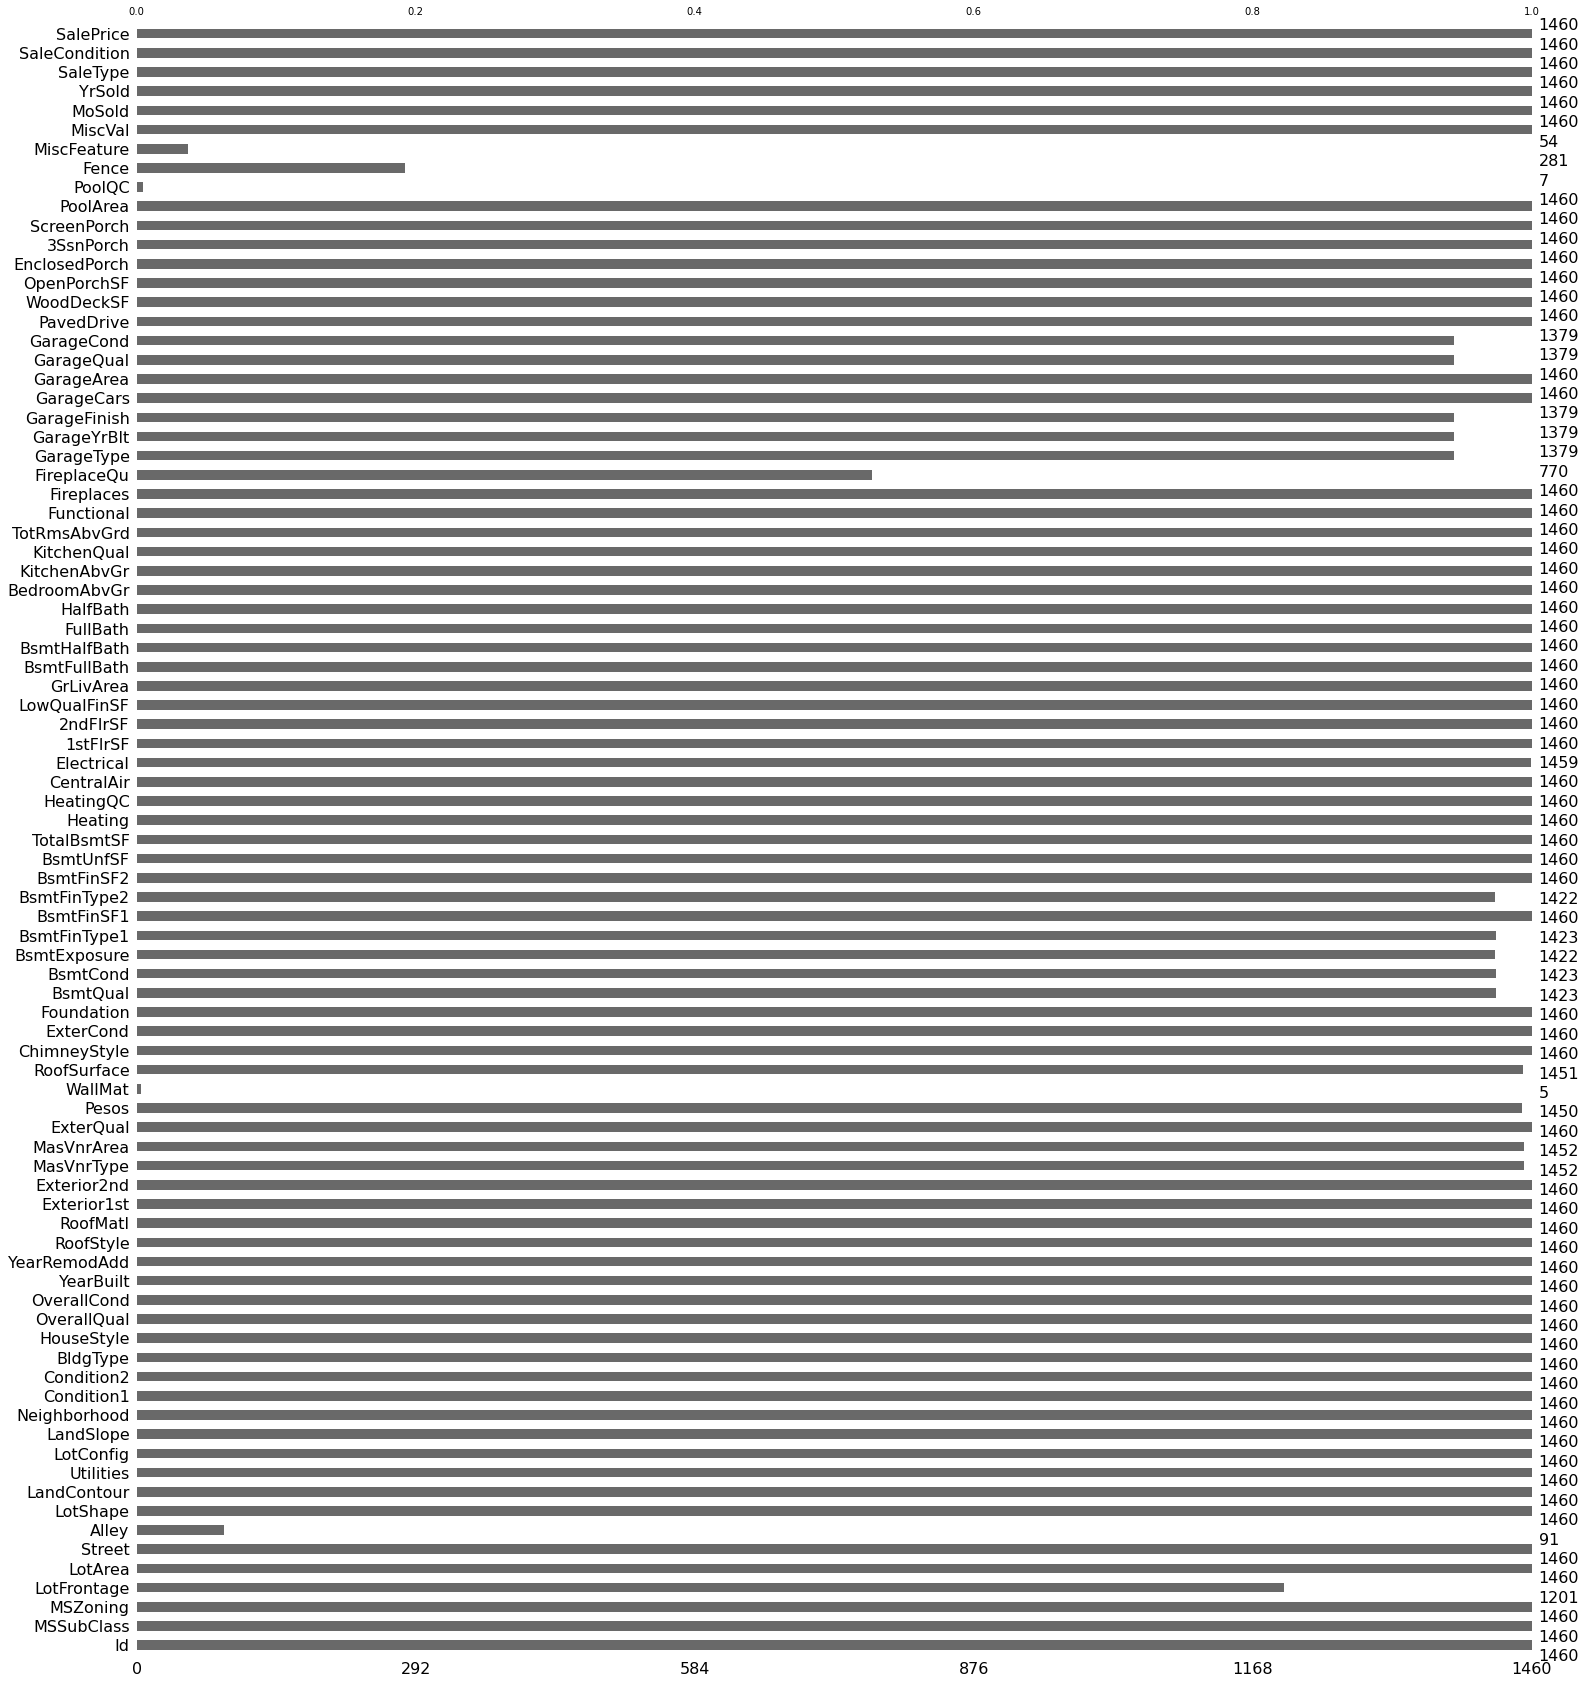

In [224]:
msno.bar(data)
plt.show()

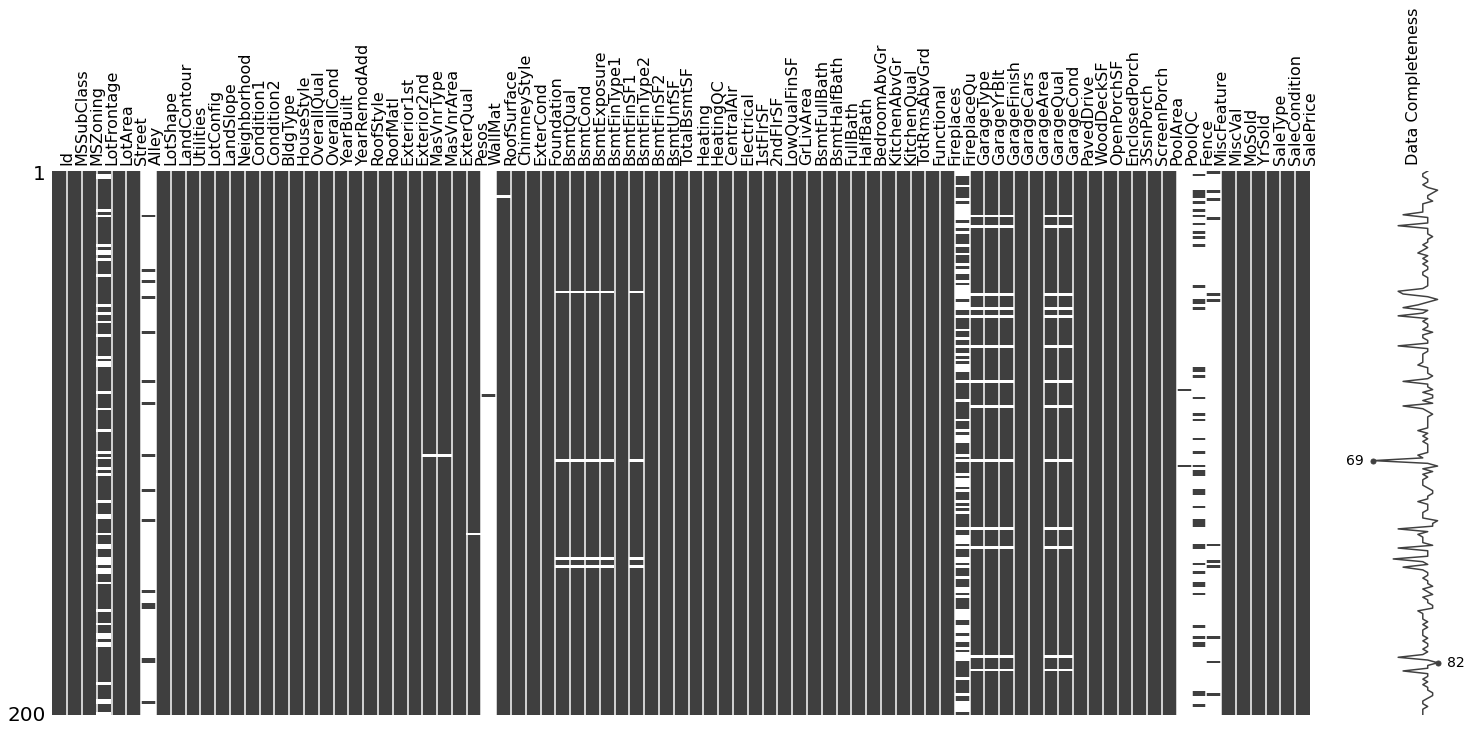

In [225]:
# Tomamos 200 muestras al azar de nuestra población

msno.matrix(data.sample(200), labels = True, label_rotation = 90)
plt.show()

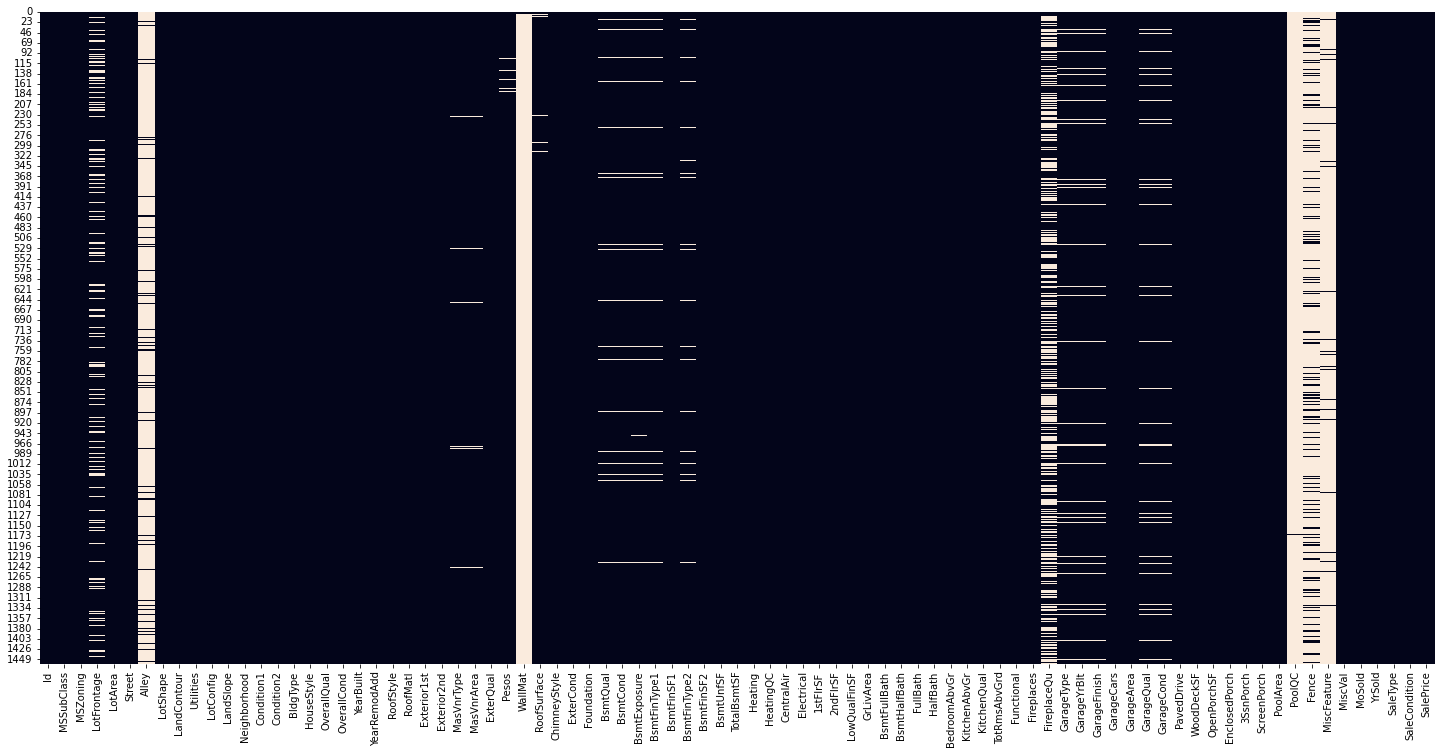

In [226]:
# Otra forma de visualizar la matriz con seaborn

plt.figure(figsize= (25,12))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

Analicemos la columna `WallMat`, que la matriz ya nos da un indicio de gran cantidad de faltantes.

In [227]:
print('Porcentaje de valores faltantes de la variable WallMat:', (data.WallMat.isnull().sum()/len(data)) * 100)

Porcentaje de valores faltantes de la variable WallMat: 99.65753424657534


In [228]:
# Optamos por dropear la columna

data.drop(columns = 'WallMat', inplace = True)

Analicemos la columna `Alley`. Como podrán observar en el diccionario de datos, este atributo puede tomar tres posibles valores.

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [229]:
print('Porcentaje de valores faltantes de la variable Alley:', (data.Alley.isnull().sum()/len(data))*100)

Porcentaje de valores faltantes de la variable Alley: 93.76712328767123


In [230]:
# Veamos los valores asume Alley

data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

Eliminar estas filas, o la columna, sería quitar información valiosa del dataset. Ya que los valores nulos, en realidad, nos están indicando una característica específica de la propiedad.

In [231]:
# Colocamos NA (NoAlley) allí donde tengamos valores faltantes en esa columna.

data.Alley.replace(np.nan, 'NA', inplace = True)

In [232]:
data.Alley.value_counts()

NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

De este caso se desprende que: *valores faltantes no necesariamente significa falta de información. A veces, es todo lo contrario.*

Analicemos, finalmente, la columna `Pesos`, que indica el precio de las propiedades.

In [233]:
print('Porcentaje de valores faltantes de la variable Pesos:', (data.Pesos.isnull().sum()/len(data))*100)

Porcentaje de valores faltantes de la variable Pesos: 0.684931506849315


La cantidad de faltantes es muy baja, no llega ni al 1%. Tendríamos que aplicar alguna técnica de imputación.

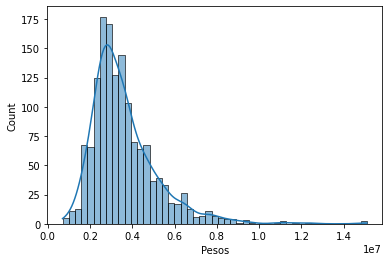

In [234]:
# Veamos cómo se distribuye la variable

sns.histplot(x = 'Pesos', data= data, kde = True)
plt.show()

Parece ser una distribución donde el promedio es muy representativo. 

Sickit-learn nos brinda algunas técnicas para realizar imputaciones de faltantes. Al hacer click en cada una de ellas, podrán acceder a sus respectivas documentaciones:

+ [Simple Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) : algoritmo univariado

+ [Iterative Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) : algoritmo multivariado

In [235]:
data.Pesos.mean()

3606867.6827586205

In [236]:
from sklearn.impute import SimpleImputer

# Definimos, en strategy, la estrategia que usaremos para la imputación. En este caso, utilizamos una medida de tendencia central.
# Más específicamente, la media

imputer = SimpleImputer(strategy = 'mean')

In [237]:
imputer.fit(data[['Pesos']])

data['Pesos'] = imputer.transform(data[['Pesos']])

In [238]:
data.Pesos.mean()

3606867.6827586205

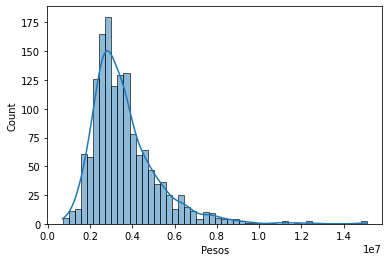

In [239]:
# Veamos cómo se distribuye, posterior a la imputación, la variable

sns.histplot(x = 'Pesos', data= data, kde = True)
plt.show()

***Siempre es importante, luego de realizar una imputación, verificar que la distribución de nuestros datos, su tendencia o patrón, no 
se modifique.***

Existen muchos otros métodos para reemplazar faltantes con estadísticos. Recomendamos familiarizarse con [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html), de pandas.

Si queremos imputar faltantes con un modelo de Machine Learning, una opción puede ser [KNN-imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html), que utiliza un modelo de vecinos más cercanos para predecir los datos que no tienen valor.

#### **`2. Identifiquemos valores atípicos y apliquemos una técnica para su tratamiento`**

Tomemos la columna GrLivArea

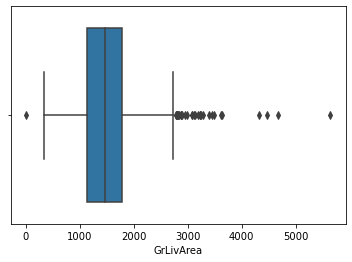

In [240]:
sns.boxplot(x = 'GrLivArea', data = data)
plt.show()

*El diagrama de cajas nos permite identificar fácilmente, y de forma visual, si tenemos outliers.*

In [241]:
# Verificamos que hay inconsistencias. El area no puede ser menor a cero.

data.GrLivArea.min()

-1

Utilizaremos la técnica del rango intercuartílico para eliminar outliers.

In [242]:
Q1 = data['GrLivArea'].quantile(0.25)
Q3 = data['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

1129.5
1776.75
647.25
158.625
2747.625


In [243]:
print('Cantidad de registros totales:', data.shape[0])
print('Cantidad de outliers:', data[(data['GrLivArea']<BI) | (data['GrLivArea']>BS)].shape[0] )

Cantidad de registros totales: 1460
Cantidad de outliers: 32


Eliminamos los outliers, es decir, aquellos valores que están por debajo del bigote inferior o por encima del bigote superior del boxplot. Para ello, recurrimos al siguiente bloque de código

In [244]:
out_GvLivArea = (data['GrLivArea']<BI) | (data['GrLivArea']>BS) 

data = data[~out_GvLivArea]

In [245]:
print('Tamaño del dataset, luego de eliminar outliers en GrLivArea:', data.shape[0])

Tamaño del dataset, luego de eliminar outliers en GrLivArea: 1428


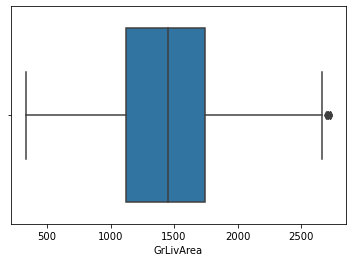

In [246]:
# Comprobamos que, haciendo una primera eliminación de outliers, la cantidad de valores extremos ahora se redujo notoriamente

sns.boxplot(x = 'GrLivArea', data = data)
plt.show()

In [247]:
data.reset_index(drop = True, inplace = True)

Estos nuevos outliers parecen ser muy pocos y no alejarse demasiado del límite superior. Queda en consideración del data scientist si seguir eliminando o con una iteración ya fue suficiente.

#### **`3. Escalado/normalización`**

Una de las posibilidades de encarar esta etapa del preprocesamiento, consiste en utilizar la clase `Standard Scaler` de Scikit-learn. Dejamos la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

### $Z = \frac{x-u}{s}$

x : muestra

u : media

s : desviación estándar

La idea, en este método, es transformar una variable para que tenga un valor medio de 0 y una desviación estándar de 1. El riesgo del escalado es su sensibilidad a los outliers.

Otra posibilidad reside en aplicar normalización. En ella, los valores del atributo se comprimen en un rango fijo [0,1]. Ocasionalmente, puede emplearse otro rango especificado. Para este método, usamos `MinMaxScaler` de Scikit-learn. [Aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) su documentación.

### $X_s = \frac{(X - X.min)}{(X.max - X.min)}$

In [249]:
# Probamos el primer método

from sklearn.preprocessing import StandardScaler

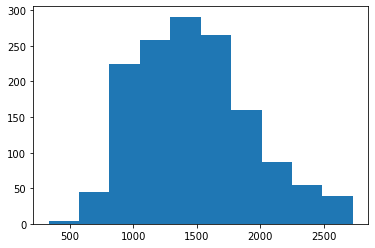

In [250]:
# Trabajaremos con la variable GrLivArea. Veamos su distribución

plt.hist(data['GrLivArea']) 
plt.show()

In [251]:
# Escalamos

scaler = StandardScaler()

scaler.fit(data[['GrLivArea']])

data['GrLivArea'] = scaler.transform(data[['GrLivArea']])


C:\Users\leand\AppData\Local\Temp\ipykernel_20164\745572821.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GrLivArea'] = scaler.transform(data[['GrLivArea']])


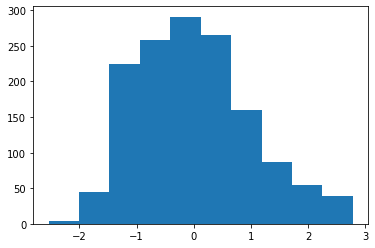

In [252]:
# Observamos cómo quedó la distribución luego de escalar

plt.hist(data['GrLivArea']) 
plt.show()

*Se puede apreciar gráficamente que tenemos una media de 0 y una desviación estándar de 1.*

#### **`4. Codificación de variables categóricas`**

Veamos la aplicación de Label Encoder para alguna variable ordinal de nuestro dataset, y One Hot Encoder para codificar una variable nominal.

In [253]:
# Trabajaremos con la variable street para Label Encoder

data.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [254]:
data.Street.value_counts()

Pave    1422
Grvl       6
Name: Street, dtype: int64

In [255]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  

data['Street'] = label_encoder.fit_transform(data['Street'])

C:\Users\leand\AppData\Local\Temp\ipykernel_20164\99044876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Street'] = label_encoder.fit_transform(data['Street'])


In [256]:
data['Street'].value_counts()

1    1422
0       6
Name: Street, dtype: int64

In [257]:
# Observamos cómo cambió todos los valores por 0 y 1

data['Street']

0       1
1       1
2       1
3       1
4       1
       ..
1423    1
1424    1
1425    1
1426    1
1427    1
Name: Street, Length: 1428, dtype: int32

In [258]:
# Trabajaremos con la variable MSZoning para One Hot Encoder

data.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [263]:
data.MSZoning.value_counts()

RL         1124
RM          214
FV           65
RH           15
C (all)      10
Name: MSZoning, dtype: int64

In [259]:
from sklearn.preprocessing import OneHotEncoder

data_encoded = data[['MSZoning']]
ohe = OneHotEncoder(handle_unknown = 'ignore')
data_encoded = pd.DataFrame(ohe.fit_transform(data_encoded).toarray())

In [260]:
# Incorporamos el dataframe codificado al dataframe original

data = data.join(data_encoded)

In [262]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,0,1,2,3,4
0,1,60,RL,65.0,8450,1,NA,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,0.0,0.0,0.0,1.0,0.0
1,2,20,RL,80.0,9600,1,NA,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,0.0,0.0,0.0,1.0,0.0
2,3,60,RL,68.0,11250,1,NA,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,0.0,0.0,0.0,1.0,0.0
3,4,70,RL,60.0,9550,1,NA,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,0.0,0.0,0.0,1.0,0.0
4,5,60,RL,84.0,14260,1,NA,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,1456,60,RL,62.0,7917,1,NA,Reg,Lvl,AllPub,...,8,2007,WD,Normal,175000,0.0,0.0,0.0,1.0,0.0
1424,1457,20,RL,85.0,13175,1,NA,Reg,Lvl,AllPub,...,2,2010,WD,Normal,210000,0.0,0.0,0.0,1.0,0.0
1425,1458,70,RL,66.0,9042,1,NA,Reg,Lvl,AllPub,...,5,2010,WD,Normal,266500,0.0,0.0,0.0,1.0,0.0
1426,1459,20,RL,68.0,9717,1,NA,Reg,Lvl,AllPub,...,4,2010,WD,Normal,142125,0.0,0.0,0.0,1.0,0.0


Para la realización de los últimos dos pasos del preprocesamiento, hay que seguir una serie de procedimientos. Para ello, dejamos algunos tips:

+ Explorar muy bien el dataset

+ Identificar correlaciones

+ Codificar todas las variables categóricas con los criterios que consideren pertinentes (PCA necesita que todas las variables del dataset sean cuantitativas)

+ Descartar columnas irrelevantes

+ Descartar columnas redundantes

+ Explorar nuevas posibilidades -creación de nuevos features- a partir del análisis de los atributos que se cuentan y la información que brindan